In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display, Latex

def display_func(s, f):
    tex = '$ {} = {} $'.format(s, sp.latex(f))
    display(Latex(tex))

In [3]:
a2, a1, a0 = sp.symbols('a2, a1, a0')
x2, x1 = sp.symbols('x2, x1')

|x_2 |x_1 |y   |
|:-: |:-: |:-: |
|1   |2   |5   |
|5   |3   |6   |
|2   |4   |10  |
|3   |7   |8   |

In [4]:
f = a2*x2 + a1*x1 + a0
display_func("f(x1, x2)", f)

<IPython.core.display.Latex object>

In [5]:
f1 = f.subs({x2: 1, x1: 2})
f2 = f.subs({x2: 5, x1: 3})
f3 = f.subs({x2: 2, x1: 4})
f4 = f.subs({x2: 3, x1: 7})
display_func("f1", f1)
display_func("f2", f2)
display_func("f3", f3)
display_func("f4", f4)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
MSE = 1/4 * ((5 - f1)**2 + (6 - f2)**2 + (10 - f3)**2 + (8 - f4)**2)
MSE = sp.nsimplify(MSE)
display_func("MSE", MSE)

<IPython.core.display.Latex object>

In [7]:
MSEa0 = MSE.diff(a0)
MSEa1 = MSE.diff(a1)
MSEa2 = MSE.diff(a2)
display_func("MSEa_0", MSEa0)
display_func("MSEa_1", MSEa1)
display_func("MSEa_2", MSEa2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

решать грамоздкую систему линейных уравнений долго

Воспользуемся фактом, что вектор, составленный из частных производных (**градиент**), напрвлен в сторону возрастания функции

$$
\vec p_{n+1} = \vec p_n - \gamma \cdot \nabla F(\vec p_n)
$$

In [8]:
point = np.array([0, 0, 0])
step = 0.01
M = list()
n = 0

In [9]:
while True:
    n += 1
    grad = np.array([MSEa0.subs({a0: point[0], a1: point[1], a2: point[2]}), \
                     MSEa1.subs({a0: point[0], a1: point[1], a2: point[2]}), \
                     MSEa2.subs({a0: point[0], a1: point[1], a2: point[2]})])
    point = point - step * grad
    
    m = MSE.subs({a0: point[0], a1: point[1], a2: point[2]})
    M.append(m)
    if m < 5.5:
        break

In [10]:
print(n)
print(MSE.subs({a0: point[0], a1: point[1], a2: point[2]}))
print(point)

28
5.49936604658629
[0.578696385845573 1.17204456767652 0.504435372166894]


In [11]:
f = f.subs({a0: point[0], a1: point[1], a2: point[2]})
display_func("f(x2, x1)", f)

<IPython.core.display.Latex object>

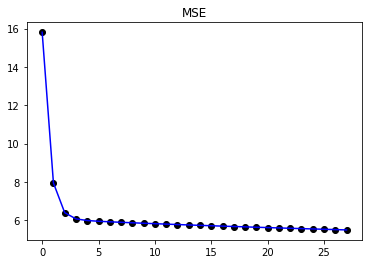

In [12]:
X = [i for i in range(n)]
plt.scatter(X, M, c='k')
plt.plot(X, M, 'b')
plt.title('MSE')
plt.show();

---
---
---

$$
\begin{cases}
    5 x + 7 y - 5 z = -47 \\
    -2 y + 2 z = 10 \\
    -4 x - 8 y - 7 z = 63 \\
    x + y + 2 z = -1 \\
    2 x - y + 2 z = -4 \\
    4 x + y + 4 z = -2
\end{cases}
$$

In [13]:
a1, a2, a3 = sp.symbols('a1, a2, a3')
x, y, z = sp.symbols('x, y, z')
f = a1*x + a2*y + a3*z
display_func("f(a1, a2, a3)", f)

<IPython.core.display.Latex object>

In [14]:
f1 = f.subs({a1: 5, a2: 7, a3: -5})
f2 = f.subs({a1: 0, a2: -2, a3: 2})
f3 = f.subs({a1: -4, a2: -8, a3: -7})
f4 = f.subs({a1: 1, a2: 1, a3: 2})
f5 = f.subs({a1: 2, a2: -1, a3: 2})
f6 = f.subs({a1: 4, a2: 1, a3: 4})
display_func("f1", f1)
display_func("f2", f2)
display_func("f3", f3)
display_func("f4", f4)
display_func("f5", f5)
display_func("f6", f6)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
MSE = 1/6 * ((-47 - f1)**2 + (10 - f2)**2 + (63 - f3)**2 + (-1 - f4)**2 + (-4 - f5)**2 + (-2 - f6)**2)
MSE = sp.nsimplify(MSE)
display_func("MSE", MSE)

<IPython.core.display.Latex object>

In [16]:
MSEx = MSE.diff(x)
MSEy = MSE.diff(y)
MSEz = MSE.diff(z)
display_func("MSE'_x", MSEx)
display_func("MSE'_y", MSEy)
display_func("MSE'_z", MSEz)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
point = np.array([0, 0, 0])
step = 0.01
M = list()
n = 0

In [18]:
while True:
    n += 1
    grad = np.array([MSEx.subs({x: point[0], y: point[1], z: point[2]}), \
                     MSEy.subs({x: point[0], y: point[1], z: point[2]}), \
                     MSEz.subs({x: point[0], y: point[1], z: point[2]})])
    point = point - step * grad
    
    m = MSE.subs({x: point[0], y: point[1], z: point[2]})
    M.append(m)
    if n == 100:
        break

In [19]:
print(n)
print(MSE.subs({x: point[0], y: point[1], z: point[2]}))
print(point)

100
36.5263766696089
[-0.0188143941082902 -6.98987988081658 -0.555834890871063]


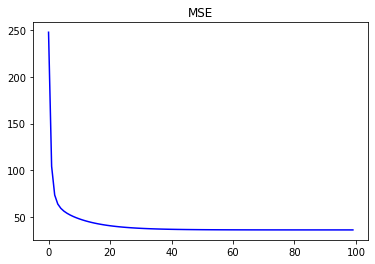

In [20]:
X = [i for i in range(n)]
plt.plot(X, M, 'b')
plt.title('MSE')
plt.show();

In [21]:
display_func("x", point[0].evalf(4))
display_func("y", point[1].evalf(4))
display_func("z", point[2].evalf(4))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---
---
---